In [1]:
import numpy as np
import uproot
import vector
import awkward
import matplotlib.pyplot as plt
import mplhep as hep

directory = "/Users/archiebrooks/Documents/Uni/mphys project/"
#directory = "c:/Users/matis/OneDrive/Documents/Y4/Project/"

hep.style.use('ATLAS')

In [204]:
def histogram(data, bins, data_label, axes, density=False, ratio=False, ratio_axes=None, set_range = None):
    if len(data[0]) != 1:
        if set_range is not None:
            global_min, global_max = set_range
        else:
            global_min = min([np.min(d) for d in data])
            global_max = max([np.max(d) for d in data])

        bin_edges = np.linspace(global_min, global_max, bins+1)
        counts = []
        bin_width = bin_edges[1]-bin_edges[0]
        for i in range(len(data)):
            if type(data[i])!= 'numpy.ndarray':
                data[i] = np.array(data[i])
                hist = np.histogram(data[i], bins=bin_edges, density=density)[0]
            counts.append(hist.astype(float))
    else:
        counts, bin_edges = int(np.histogram(data, bins=bins, density=density))
    hep.histplot(counts, bin_edges, ax=axes, label=data_label, histtype='step')
    bin_width = bin_edges[1]-bin_edges[0]
    axes.set_ylabel(f'Events /{bin_width:.2g} GeV')
    axes.legend()

    if ratio:
        reference_counts = counts[0]
        for i in range(1, len(counts)):
            ratio_values = np.divide(counts[i], reference_counts, out=np.zeros_like(counts[i]), where=reference_counts != 0)
            hep.histplot(ratio_values, bin_edges, ax=ratio_axes, label=f'{data_label[i]}/{data_label[0]}')
        ratio_axes.set_ylabel("Ratio")
        ratio_axes.set_xlabel(axes.get_xlabel())
        ratio_axes.axhline(1, color='black', linestyle='--')  # Reference line at ratio=1
        ratio_axes.legend()
        if ratio_axes.get_ylim()[1]>5:
            ratio_axes.set_ylim(0,5)

    hep.atlas.label(ax=axes)

In [ ]:
mass_lookup = {
    1: 2.16E-3,
    2: 4.7E-3,
    3: 1.273,
    4: 93.5E-3,
    5: 172.57,
    6: 4.183,
    11: 0.511E-3,
    12: 0,
    13: 105.66E-3,
    14: 0,
    15: 1.77693,
    16: 0,
    21: 0
}

In [480]:
tree4 = uproot.open(directory + "MPHYS-4Top/ttt_304014_mc20a_fullsim.root")
tree3 = uproot.open(directory + "MPHYS-4Top/tttt_412043_mc20a_fastsim.root")
events_4t = tree4["reco;1"].arrays(['jet_e_NOSYS','jet_eta','jet_partonid','jet_phi','jet_pt_NOSYS', 'jet_truthHiggsIndex', 'jet_truthTopIndex', 'jet_truthflav', 'jets_deltaR_NOSYS', 'lepton_0_charge_NOSYS', 'lepton_0_pt_GeV_NOSYS', 'lepton_0plus1_pt_GeV_NOSYS', 'lepton_1_charge_NOSYS', 'lepton_1_pt_GeV_NOSYS', 'lepton_2_charge_NOSYS', 'lepton_2_pt_GeV_NOSYS', 'lepton_3_charge_NOSYS', 'lepton_3_pt_GeV_NOSYS', 'lepton_Id', 'lepton_charge', 'lepton_e_NOSYS', 'lepton_eta', 'lepton_phi', 'lepton_pt_NOSYS', 'lepton_truthCat'])
events_3t = tree3["reco;1"].arrays(['jet_e_NOSYS','jet_eta','jet_partonid','jet_phi','jet_pt_NOSYS', 'jet_truthHiggsIndex', 'jet_truthTopIndex', 'jet_truthflav', 'jets_deltaR_NOSYS', 'lepton_0_charge_NOSYS', 'lepton_0_pt_GeV_NOSYS', 'lepton_0plus1_pt_GeV_NOSYS', 'lepton_1_charge_NOSYS', 'lepton_1_pt_GeV_NOSYS', 'lepton_2_charge_NOSYS', 'lepton_2_pt_GeV_NOSYS', 'lepton_3_charge_NOSYS', 'lepton_3_pt_GeV_NOSYS', 'lepton_Id', 'lepton_charge', 'lepton_e_NOSYS', 'lepton_eta', 'lepton_phi', 'lepton_pt_NOSYS', 'lepton_truthCat'])



jets_pt_4t = events_4t['jet_pt_NOSYS']
jets_eta_4t = events_4t['jet_eta']
jets_phi_4t = events_4t['jet_phi']
jets_e_4t = events_4t['jet_e_NOSYS']

jets_pt_3t = events_3t['jet_pt_NOSYS']
jets_eta_3t = events_3t['jet_eta']
jets_phi_3t = events_3t['jet_phi']
jets_e_3t = events_3t['jet_e_NOSYS']

jets_4t = vector.zip({'pt':jets_pt_4t,'eta':jets_eta_4t,'phi':jets_phi_4t,'energy':jets_e_4t})
jets_3t = vector.zip({'pt':jets_pt_3t,'eta':jets_eta_3t,'phi':jets_phi_3t,'energy':jets_e_3t})

leptons_pt_4t = events_4t['lepton_pt_NOSYS']
leptons_eta_4t = events_4t['lepton_eta']
leptons_phi_4t = events_4t['lepton_phi']
leptons_e_4t = events_4t['lepton_e_NOSYS']

leptons_pt_3t = events_3t['lepton_pt_NOSYS']
leptons_eta_3t = events_3t['lepton_eta']
leptons_phi_3t = events_3t['lepton_phi']
leptons_e_3t = events_3t['lepton_e_NOSYS']

leptons_4t = vector.zip({'pt':leptons_pt_4t,'eta':leptons_eta_4t,'phi':leptons_phi_4t,'energy':leptons_e_4t})
leptons_3t = vector.zip({'pt':leptons_pt_3t,'eta':leptons_eta_3t,'phi':leptons_phi_3t,'energy':leptons_e_3t})

jets_4t = jets_4t[np.argwhere([(len(a1) > 1) and (len(a2) > 1) for a1,a2 in zip(jets_4t,leptons_4t)]).flatten()]
leptons_4t = leptons_4t[np.argwhere([len(a1) > 1 and len(a2) > 1 for a1,a2 in zip(jets_4t,leptons_4t)]).flatten()]

jets_3t = jets_3t[np.argwhere([len(a1) > 1 and len(a2) > 1 for a1,a2 in zip(jets_3t,leptons_3t)]).flatten()]
leptons_3t = leptons_3t[np.argwhere([len(a1) > 1 and len(a2) > 1 for a1,a2 in zip(jets_3t,leptons_3t)]).flatten()]

Max number of jets in 4t: 13 - once \\n
Min number of jets in 4t: 0 - once \\n
Max number of jets in 3t: 19 - once \\\ 
Min number of jets in 3t: 1 - 5times \\\ 

660 4 lepton events - 3t
30 4 lepton events - 4t

1387 2l events - 4t
31506 2l events - 3t

In [493]:
highest_pt_jet_4t = jets_4t[:,0]
highest_pt_jet_3t = jets_3t[:,0]
highest_pt_lepton_4t = leptons_4t[:,0]
highest_pt_lepton_3t = leptons_3t[:,0]


lowest_pt_jet_4t = jets_4t[:,-1]
lowest_pt_jet_3t = jets_3t[:,-1]
lowest_pt_lepton_4t = leptons_4t[:,-1]
lowest_pt_lepton_3t = leptons_3t[:,-1]

highest_pt_3t = np.maximum(highest_pt_jet_3t.pt,highest_pt_lepton_3t.pt)
highest_pt_4t = np.maximum(highest_pt_jet_4t.pt,highest_pt_lepton_4t.pt)

lowest_pt_3t = np.minimum(lowest_pt_jet_3t.pt,lowest_pt_lepton_3t.pt)
lowest_pt_4t = np.minimum(lowest_pt_jet_4t.pt,lowest_pt_lepton_4t.pt)

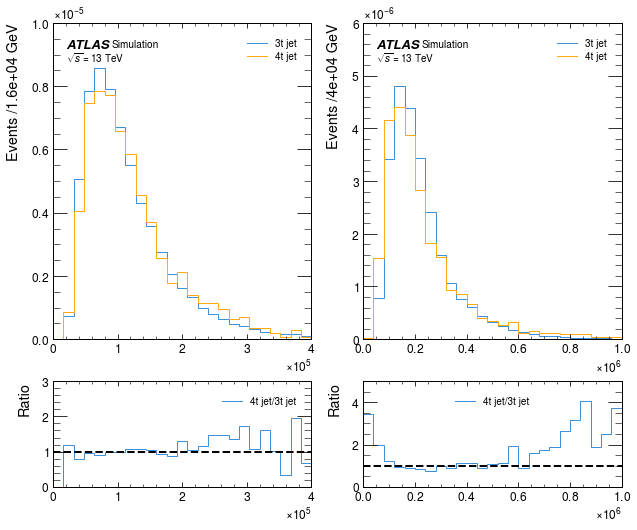

In [471]:
fig, ax = plt.subplots(2,2,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,8))
histogram([highest_pt_lepton_3t.pt, highest_pt_lepton_4t.pt], 25, ['3t jet','4t jet'], ax[0,0], ratio=True, ratio_axes=ax[1,0], density=True, set_range=(0,0.4E6))
histogram([highest_pt_jet_3t.pt, highest_pt_jet_4t.pt], 25, ['3t jet','4t jet'], ax[0,1], ratio=True, ratio_axes=ax[1,1], density=True, set_range=(0,1E6))

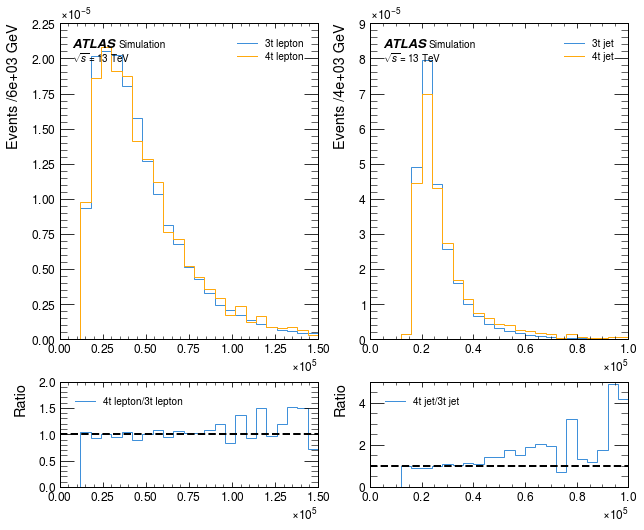

In [472]:
fig, ax = plt.subplots(2,2,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,8))
histogram([lowest_pt_lepton_3t.pt, lowest_pt_lepton_4t.pt], 25, ['3t lepton','4t lepton'], ax[0,0], ratio=True, ratio_axes=ax[1,0], density=True, set_range=(0,1.5E5))
histogram([lowest_pt_jet_3t.pt, lowest_pt_jet_4t.pt], 25, ['3t jet','4t jet'], ax[0,1], ratio=True, ratio_axes=ax[1,1], density=True, set_range=(0,1E5))

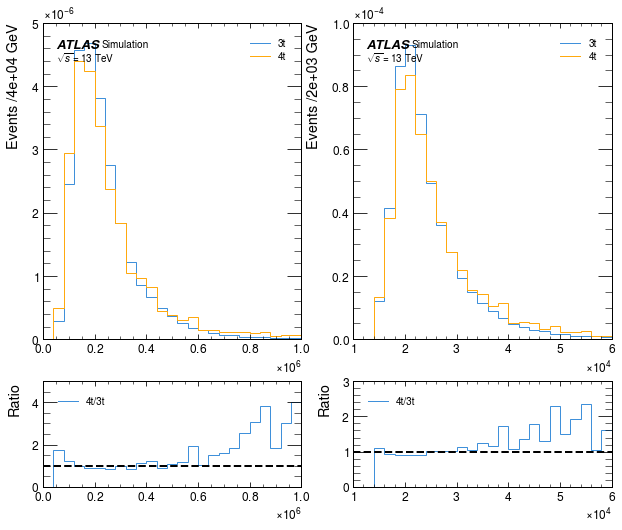

In [473]:
fig, ax = plt.subplots(2,2,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,8))
histogram([highest_pt_3t, highest_pt_4t], 25, ['3t','4t'], ax[0,0], ratio=True, ratio_axes=ax[1,0], density=True, set_range=(0,1E6))
histogram([lowest_pt_3t, lowest_pt_4t], 25, ['3t','4t'], ax[0,1], ratio=True, ratio_axes=ax[1,1], density=True, set_range=(1E4,6E4))

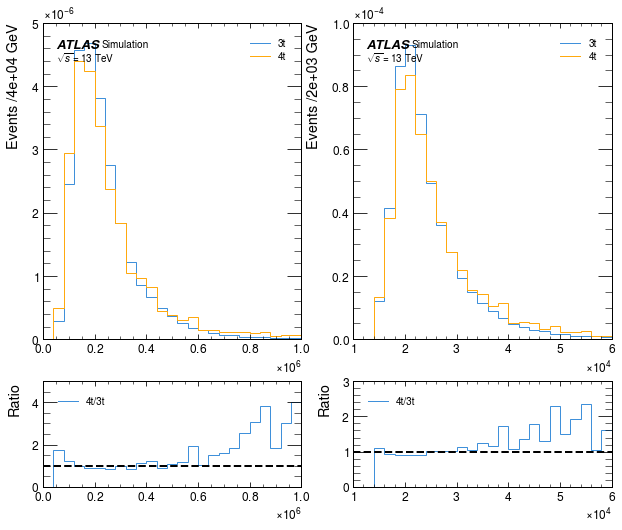

In [474]:
fig, ax = plt.subplots(2,2,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,8))
histogram([highest_pt_3t, highest_pt_4t], 25, ['3t','4t'], ax[0,0], ratio=True, ratio_axes=ax[1,0], density=True, set_range=(0,1E6))
histogram([lowest_pt_3t, lowest_pt_4t], 25, ['3t','4t'], ax[0,1], ratio=True, ratio_axes=ax[1,1], density=True, set_range=(1E4,6E4))

In [475]:
eta_4t_jets = jets_4t[np.argsort(np.abs(jets_4t.eta))]
eta_3t_jets = jets_3t[np.argsort(np.abs(jets_3t.eta))]
eta_4t_leptons = leptons_4t[np.argsort(np.abs(leptons_4t.eta))]
eta_3t_leptons = leptons_3t[np.argsort(np.abs(leptons_3t.eta))]

phi_4t_jets = jets_4t[np.argsort(jets_4t.phi)]
phi_3t_jets = jets_3t[np.argsort(jets_3t.phi)]
phi_4t_leptons = leptons_4t[np.argsort(leptons_4t.phi)]
phi_3t_leptons = leptons_3t[np.argsort(leptons_3t.phi)]

In [476]:
highest_eta_jet_4t = eta_4t_jets[:,-1]
highest_eta_jet_3t = eta_3t_jets[:,-1]
highest_eta_lepton_4t = eta_4t_leptons[:,-1]
highest_eta_lepton_3t = eta_3t_leptons[:,-1]

lowest_eta_jet_4t = eta_4t_jets[:,0]
lowest_eta_jet_3t = eta_3t_jets[:,0]
lowest_eta_lepton_4t = eta_4t_leptons[:,0]
lowest_eta_lepton_3t = eta_3t_leptons[:,0]

highest_eta_3t = np.maximum(np.abs(highest_eta_jet_3t.eta),np.abs(highest_eta_lepton_3t.eta))
highest_eta_4t = np.maximum(np.abs(highest_eta_jet_4t.eta),np.abs(highest_eta_lepton_4t.eta))

lowest_eta_3t = np.minimum(np.abs(lowest_eta_jet_3t.eta),np.abs(lowest_eta_lepton_3t.eta))
lowest_eta_4t = np.minimum(np.abs(lowest_eta_jet_4t.eta),np.abs(lowest_eta_lepton_4t.eta))

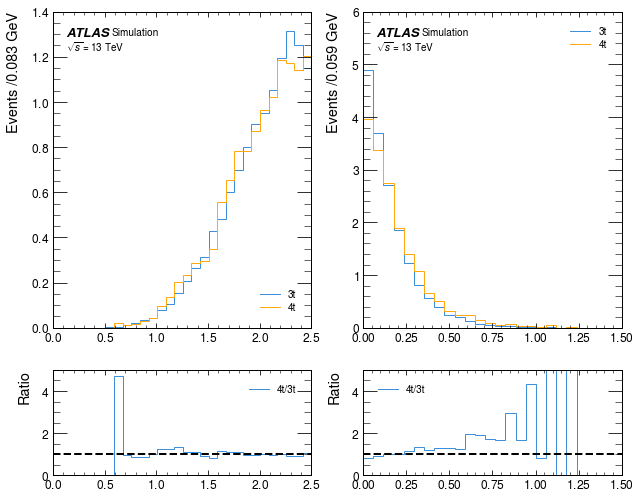

In [477]:
fig, ax = plt.subplots(2,2,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,8))
histogram([highest_eta_3t, highest_eta_4t], 25, ['3t','4t'], ax[0,0], ratio=True, ratio_axes=ax[1,0], density=True)
histogram([lowest_eta_3t, lowest_eta_4t], 25, ['3t','4t'], ax[0,1], ratio=True, ratio_axes=ax[1,1], density=True)

In [499]:
second_highest_pt_jet_4t = jets_4t[:,1]
second_highest_pt_jet_3t = jets_3t[:,1]
second_highest_pt_lepton_4t = leptons_4t[:,1]
second_highest_pt_lepton_3t = leptons_3t[:,1]

highest_pt_3t = np.sort((highest_pt_jet_3t,highest_pt_lepton_3t,second_highest_pt_jet_3t,second_highest_pt_lepton_3t), axis=1)[0]
second_highest_pt_3t = np.sort((highest_pt_jet_3t,highest_pt_lepton_3t,second_highest_pt_jet_3t,second_highest_pt_lepton_3t), axis=1)[1]
highest_pt_4t = np.sort(highest_pt_jet_4t.pt,highest_pt_lepton_4t.pt)

print(highest_pt_3t)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Array'

This error occurred while calling

    ak.sort(
        <Array [1.63e+05, 7.02e+04, ..., 1.27e+05] type='2137 * float32'>
        axis = <Array [8.91e+04, 9.11e+04, ..., 2e+05] type='2137 * float32'>
        stable = False
    )

In [494]:
print(highest_pt_lepton_3t.pt)
print(second_highest_pt_lepton_3t.pt)

[7.19e+04, 9.8e+04, 6.22e+04, 5.49e+04, ..., 1.04e+05, 3.34e+04, 8.88e+04]
[4.76e+04, 7.41e+04, 6.09e+04, 2.28e+04, ..., 5.76e+04, 1.7e+04, 8.21e+04]


In [491]:
print(highest_pt_3t)

[[ 19868.818  20091.938  20310.736 ... 878437.94  885099.9   897619.75 ]
 [ 15001.107  15003.527  15004.913 ... 486603.88  498403.12  521121.9  ]
 [ 19868.818  20091.938  20310.736 ... 878437.94  885099.9   897619.75 ]
 [ 15001.107  15003.527  15004.913 ... 486603.88  498403.12  521121.9  ]]
